In [ ]:
import pandas as pd
import networkx as nx
import math


# Cargar el archivo Excel
file_path = "/content/para red social 998 registros.xlsx"
data = pd.read_excel(file_path, sheet_name="Data")

# Crear un grafo dirigido
G = nx.DiGraph()

airbnb_weight = 7700000 + 5000000
G.add_node("Airbnb", weight=airbnb_weight)

gov_weight = 12700 + 11500 + 1392226
G.add_node("Gobierno_Ajijic", weight=gov_weight)

# Calcular el peso de los anfitriones
host_weights = {}
for _, row in data.iterrows():
    host_name = row["host_name"]
    if host_name not in host_weights:
        host_weights[host_name] = {
            "count": 0,
            "superhost_points": 0,
            "cohosts": 0,
            "location_points": 0,
            "rating": 0,
            "host_count": 0,
            "host_years": 0,
            "reviews_count": 0,
        }

    # Contar cuántas veces aparece el anfitrión
    host_weights[host_name]["count"] += 1

    # Superhost points
    if row["Superhost"]:
        host_weights[host_name]["superhost_points"] += 2
    else:
        host_weights[host_name]["superhost_points"] += 1

    # Cohosts
    for cohost in ["cohosts_1", "cohosts_2", "cohosts_3"]:
        if pd.notna(row[cohost]):
            host_weights[host_name]["cohosts"] += 1

    # Host location points
    if isinstance(row["host_location"], str):
        if "mexico" in row["host_location"].lower():
            host_weights[host_name]["location_points"] += 3
        else:
            host_weights[host_name]["location_points"] += 2
    else:
        host_weights[host_name]["location_points"] += 0

    # Sumar otros valores
    host_weights[host_name]["rating"] += row["host_rating"]
    host_weights[host_name]["host_count"] += row["host_Count"]
    host_weights[host_name]["host_years"] += row["host_years"]
    host_weights[host_name]["reviews_count"] += row["reviewsCount"]

# Agregar los nodos de anfitriones al grafo
for host_name, values in host_weights.items():
    total_weight = (
        values["count"]
        + values["superhost_points"]
        + values["cohosts"]
        + values["location_points"]
        + values["rating"]
        + values["host_count"]
        + values["host_years"]
        + values["reviews_count"]
    )
    G.add_node(host_name, weight=total_weight)  # Ensure 'weight' is used here
    print(f"Host: {host_name}, Weight: {total_weight}")  # Print host weight

    # Calcular el peso de las propiedades
property_weights = {}
for _, row in data.iterrows():
    listing_id = row["Listing_id"]
    property_weights[listing_id] = {
        "room_category_points": 0,
        "listing_rating": 0,
        "reviews": 0,
        "max_guest": 0,
        "pets_allowed": 0,
        "instant_book": 0,
        "amenities_pool": 0,
    }

    # Room category points
    if row["room_Category"] == "entire_home":
        property_weights[listing_id]["room_category_points"] += 3
    elif row["room_Category"] == "private_room":
        property_weights[listing_id]["room_category_points"] += 1

    # Pets allowed
    if row["petsAllowed"]:
        property_weights[listing_id]["pets_allowed"] += 2

    # Instant book
    if row["canInstantBook"]:
        property_weights[listing_id]["instant_book"] += 2

    # Amenities pool
    for i in range(10):  # amenities/0/title a amenities/9/title
        amenity_col = f"amenities/{i}/title"
        if pd.notna(row[amenity_col]) and "pool" in row[amenity_col].lower():
            property_weights[listing_id]["amenities_pool"] += 1

    # Sumar otros valores
    property_weights[listing_id]["listing_rating"] += row["Listing_Rating"]
    property_weights[listing_id]["reviews"] += row["Reviews"]
    property_weights[listing_id]["max_guest"] += row["maxGuest"]

# Agregar los nodos de propiedades al grafo
for listing_id, values in property_weights.items():
    total_weight = (
        values["room_category_points"]
        + values["listing_rating"]
        + values["reviews"]
        + values["max_guest"]
        + values["pets_allowed"]
        + values["instant_book"]
        + values["amenities_pool"]
    )
    G.add_node(listing_id, weight=total_weight)  # Ensure 'weight' is used here
    print(f"Property: {listing_id}, Weight: {total_weight}")  # Print property weight


# The following for loops were not indented correctly.
# Indenting them to be part of the main code block fixes the IndentationError
for host_name, values in host_weights.items():
    G.add_edge("Airbnb", host_name, weight=values["count"])

for _, row in data.iterrows():
    listing_id = row["Listing_id"]
    host_name = row["host_name"]
    edge_weight = row["Reviews"] * row["maxGuest"]
    G.add_edge(listing_id, host_name, weight=edge_weight)


total_properties = len(data)
percentage_per_property = 12700 / total_properties

for listing_id in property_weights.keys():
    G.add_edge(listing_id, "Gobierno_Ajijic", weight=percentage_per_property)


nx.write_gexf(G, "red_actores.gexf")

Host: Adan, Weight: 250.96
Host: Adrian, Weight: 473.66
Host: Ale, Weight: 182.0
Host: Alejandra, Weight: 2023.44
Host: Alejandra Grupo Bosque, Weight: 1825.14
Host: Alejandro, Weight: 231.95
Host: Alexander, Weight: 206.92000000000002
Host: Alfredo, Weight: 525.44
Host: Alvaro, Weight: 223.5
Host: Amalia, Weight: 361.84000000000003
Host: Amparo Del Carmen, Weight: 187.93
Host: Ana, Weight: 282.77
Host: Ana Bertha, Weight: 53.94
Host: Ana Laura, Weight: 4618.92
Host: Ana Teresa, Weight: 125.0
Host: Andrea, Weight: 1136.4099999999999
Host: Andres, Weight: 21.71
Host: Annie, Weight: 183.96
Host: Armand, Weight: 279.48
Host: Arturo, Weight: 144.89
Host: Astrid, Weight: 698.67
Host: Beatriz, Weight: 196.6
Host: Bernadette, Weight: 316.83
Host: Brycen, Weight: 302.9
Host: Carmen, Weight: 343.53999999999996
Host: Carol, Weight: 398.94
Host: Carolina, Weight: 219.0
Host: Caryn, Weight: 115.97
Host: Casandra, Weight: 67.0
Host: Cathy, Weight: 539.96
Host: Centeya, Weight: 197.88
Host: Cesar, W

In [ ]:
import pandas as pd
import networkx as nx

# Cargar el archivo Excel
file_path = "/content/para red social 998 registros.xlsx"
data = pd.read_excel(file_path, sheet_name="Data")

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodo Airbnb
airbnb_weight = 7700000 + 5000000
G.add_node("Airbnb", Weight=airbnb_weight)

# Agregar nodo Gobierno_Ajijic
gov_weight = 12700 + 11500 + 1392226
G.add_node("Gobierno_Ajijic", Weight=gov_weight)

# Calcular el peso de los anfitriones
host_weights = {}
for _, row in data.iterrows():
    host_name = row["host_name"]
    if host_name not in host_weights:
        host_weights[host_name] = {
            "count": 0,
            "superhost_points": 0,
            "cohosts": 0,
            "location_points": 0,
            "rating": 0,
            "host_count": 0,
            "host_years": 0,
            "reviews_count": 0,
        }
    # Contar cuántas veces aparece el anfitrión
    host_weights[host_name]["count"] += 1
    # Superhost points
    if row["Superhost"]:
        host_weights[host_name]["superhost_points"] += 2
    else:
        host_weights[host_name]["superhost_points"] += 1
    # Cohosts
    for cohost in ["cohosts_1", "cohosts_2", "cohosts_3"]:
        if pd.notna(row[cohost]):
            host_weights[host_name]["cohosts"] += 1
    # Host location points
    if isinstance(row["host_location"], str):
        if "mexico" in row["host_location"].lower():
            host_weights[host_name]["location_points"] += 3
        else:
            host_weights[host_name]["location_points"] += 2
    else:
        host_weights[host_name]["location_points"] += 0
    # Sumar otros valores
    host_weights[host_name]["rating"] += row["host_rating"]
    host_weights[host_name]["host_count"] += row["host_Count"]
    host_weights[host_name]["host_years"] += row["host_years"]
    host_weights[host_name]["reviews_count"] += row["reviewsCount"]

# Agregar los nodos de anfitriones al grafo
for host_name, values in host_weights.items():
    total_weight = (
        values["count"]
        + values["superhost_points"]
        + values["cohosts"]
        + values["location_points"]
        + values["rating"]
        + values["host_count"]
        + values["host_years"]
        + values["reviews_count"]
    )
    G.add_node(host_name, Weight=total_weight)

# Calcular el peso de las propiedades
property_weights = {}
for _, row in data.iterrows():
    listing_id = row["Listing_id"]
    property_weights[listing_id] = {
        "room_category_points": 0,
        "listing_rating": 0,
        "reviews": 0,
        "max_guest": 0,
        "pets_allowed": 0,
        "instant_book": 0,
        "amenities_pool": 0,
    }
    # Room category points
    if row["room_Category"] == "entire_home":
        property_weights[listing_id]["room_category_points"] += 3
    elif row["room_Category"] == "private_room":
        property_weights[listing_id]["room_category_points"] += 1
    # Pets allowed
    if row["petsAllowed"]:
        property_weights[listing_id]["pets_allowed"] += 2
    # Instant book
    if row["canInstantBook"]:
        property_weights[listing_id]["instant_book"] += 2
    # Amenities pool
    for i in range(10):  # amenities/0/title a amenities/9/title
        amenity_col = f"amenities/{i}/title"
        if pd.notna(row[amenity_col]) and "pool" in row[amenity_col].lower():
            property_weights[listing_id]["amenities_pool"] += 1
    # Sumar otros valores
    property_weights[listing_id]["listing_rating"] += row["Listing_Rating"]
    property_weights[listing_id]["reviews"] += row["Reviews"]
    property_weights[listing_id]["max_guest"] += row["maxGuest"]

# Agregar los nodos de propiedades al grafo
for listing_id, values in property_weights.items():
    total_weight = (
        values["room_category_points"]
        + values["listing_rating"]
        + values["reviews"]
        + values["max_guest"]
        + values["pets_allowed"]
        + values["instant_book"]
        + values["amenities_pool"]
    )
    G.add_node(listing_id, Weight=total_weight)

# Agregar aristas entre Airbnb y anfitriones
for host_name, values in host_weights.items():
    G.add_edge("Airbnb", host_name, Weight=values["count"])

# Agregar aristas entre propiedades y anfitriones
for _, row in data.iterrows():
    listing_id = row["Listing_id"]
    host_name = row["host_name"]
    edge_weight = row["Reviews"] * row["maxGuest"]
    G.add_edge(listing_id, host_name, Weight=edge_weight)

# Agregar aristas entre propiedades y gobierno
total_properties = len(data)
percentage_per_property = 12700 / total_properties
for listing_id in property_weights.keys():
    G.add_edge(listing_id, "Gobierno_Ajijic", Weight=percentage_per_property)

# Exportar nodos a CSV
nodes_data = []
for node, data in G.nodes(data=True):
    nodes_data.append({"Id": node, "Label": node, "Weight": data.get("Weight", 0)})
nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv("nodos.csv", index=False)

# Exportar aristas a CSV
edges_data = []
for u, v, data in G.edges(data=True):
    edges_data.append({
        "Source": u,
        "Target": v,
        "Type": "Directed",
        "Weight": data.get("Weight", 0)
    })
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv("aristas.csv", index=False)

print("Archivos CSV generados: 'nodos.csv' y 'aristas.csv'")

Archivos CSV generados: 'nodos.csv' y 'aristas.csv'


Densidad de la red: 0.0017077517077517077
Modularidad de la red: 0.9663516068052924


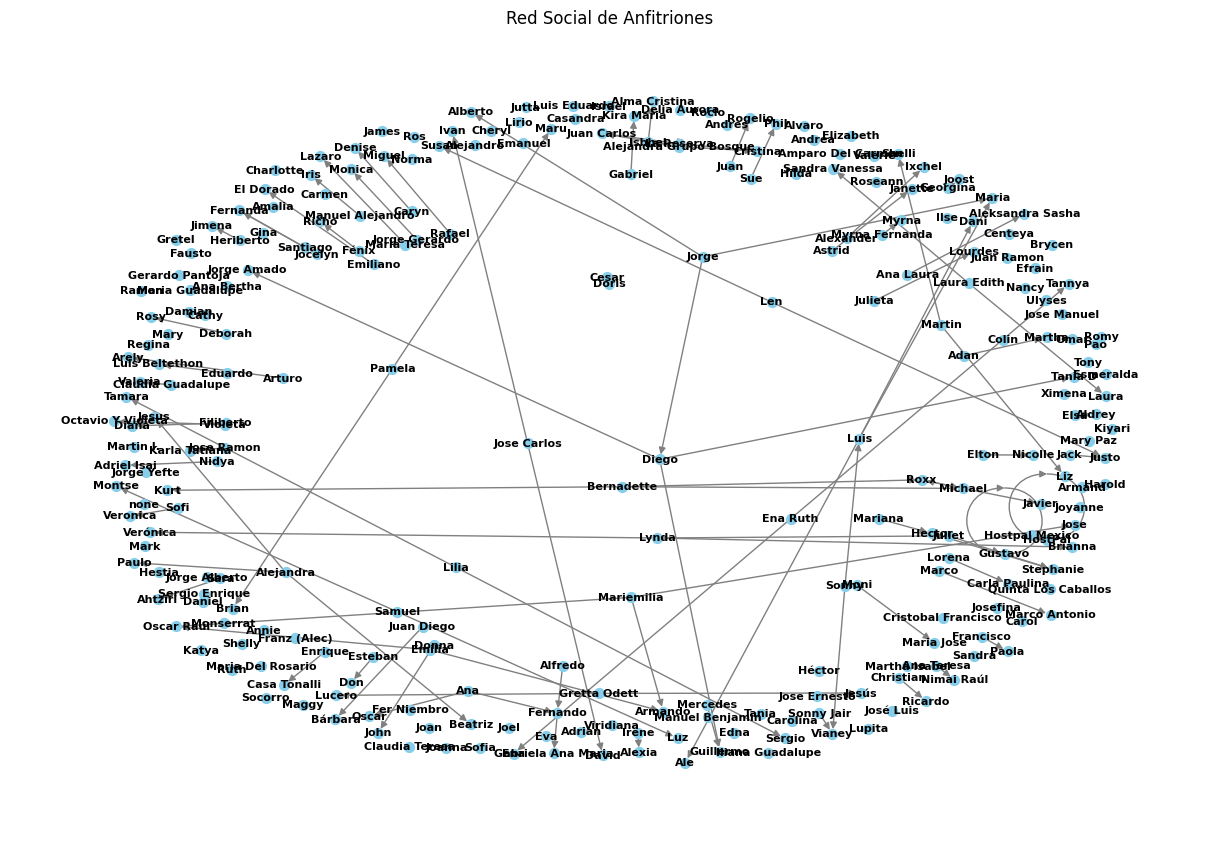

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar los datos del archivo Excel
file_path = '/content/para red social 998 registros.xlsx'
data = pd.read_excel(file_path, sheet_name='Data')

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos (anfitriones) al grafo
for _, row in data.iterrows():
    G.add_node(row['host_name'], host_rating=row['host_rating'], superhost=row['Superhost'])

# Añadir aristas (relaciones entre anfitriones y propiedades)
for _, row in data.iterrows():
    if not pd.isna(row['cohosts_1']):
        G.add_edge(row['host_name'], row['cohosts_1'])
    if not pd.isna(row['cohosts_2']):
        G.add_edge(row['host_name'], row['cohosts_2'])
    if not pd.isna(row['cohosts_3']):
        G.add_edge(row['host_name'], row['cohosts_3'])

# Calcular métricas de la red
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
density = nx.density(G)
modularity = nx.algorithms.community.modularity(
    G, nx.algorithms.community.greedy_modularity_communities(G))

# Imprimir las métricas calculadas
print("Densidad de la red:", density)
print("Modularidad de la red:", modularity)

# Visualización básica del grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8, font_weight='bold', edge_color='gray')
plt.title("Red Social de Anfitriones")
plt.show()